## Procesamiento de Imágenes - Diplodatos 2022

Trabajo Práctico

In [1]:
integrantes = ["Carlos Sanchez Herrera", "Franco Ferrero", "Sebastian Serantes" ]
print(*integrantes, sep="\n")


Carlos Sanchez Herrera
Franco Ferrero
Sebastian Serantes


## Importamos las librerías necesarias

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Definimos las funciones que vamos a utilizar

In [13]:

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def change_yiq (img, alpha=1, beta=1):
    img1 = img.copy()
    img1[:, :, 0] = np.clip((img[:, :, 0] * alpha), 0, 1)
    img1[:, :, 1] = np.clip((img[:, :, 1] * beta), -0.5957, 0.5957)
    img1[:, :, 2] = np.clip((img[:, :, 2] * beta), -0.5957, 0.5957)
    return img1

## Cargamos la imagen a trabajar en el TP

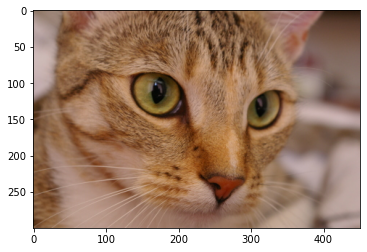

In [14]:
img_rgb = imageio.imread('imageio:chelsea.png')
plt.imshow(img_rgb)

# Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

[0.54939608 0.06777322 0.00238148]
[1.         0.06777322 0.00238148]
[1.         0.24466132 0.00859714]
1.0
0.5957
0.1970607263529411


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

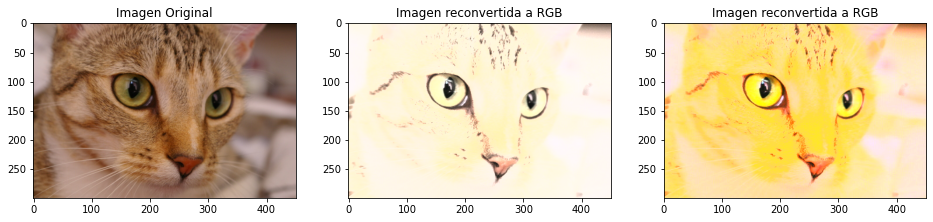

In [15]:
# Definimos las matrices que seran necesaria para convertir la imagen de RGB a YIQ y viceversa.
rgb_to_yiq = np.array([[0.299, 0.587, 0.114],
                      [0.595716, -0.274453, -0.321263],
                      [0.211456, -0.522591, 0.311135]])

yiq_to_rgb = np.array([[1, 0.9663, 0.6210], 
                      [1, -0.2721, -0.6474], 
                      [1, -1.1070, 1.7046]])

# Normalizamos la imagen antes de trabajar con la misma
img_rgb_normalizada = img_rgb/255

img_yiq = apply_matrix(img_rgb_normalizada, rgb_to_yiq)

img_yiq_1 = change_yiq(img_yiq, alpha=1.8)
img_yiq_2 = change_yiq(img_yiq, alpha=1.8, beta=1.9)

img_rgb_1 = np.clip(apply_matrix(img_yiq_1, yiq_to_rgb), 0, 1)
img_rgb_2 = np.clip(apply_matrix(img_yiq_2, yiq_to_rgb), 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(16,8))
axes[0].imshow(img_rgb_normalizada)
axes[0].set_title('Imagen Original')
axes[1].imshow(img_rgb_1)
axes[1].set_title('Imagen reconvertida a RGB')
axes[2].imshow(img_rgb_2)
axes[2].set_title('Imagen reconvertida a RGB')

# Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

# Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

#Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

# Ejercicios Optativos. Ver presentación para más detalle
Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.